In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from fonctions import *
import optuna
feature_matrix = pd.read_pickle('20230225_table_feature_matrix.csv')
target = pd.read_pickle('20230225_table_target.csv')

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.2, random_state=1)



c:\Users\benpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Le modèle a été entrainé en :  13  secondes.
L'AUC initial pour le modèle : Régression Logistique est de : 0.7749214640684093
Le modèle a été entrainé en :  326  secondes.
L'AUC initial pour le modèle : Random Forest est de : 0.7603118420235088
Le modèle a été entrainé en :  8  secondes.
L'AUC initial pour le modèle : LightGBM est de : 0.7941187796627636
[0]	train-logloss:0.57830	eval-logloss:0.57589
[1]	train-logloss:0.56530	eval-logloss:0.56283
[2]	train-logloss:0.55904	eval-logloss:0.55672
[3]	train-logloss:0.55580	eval-logloss:0.55361
[4]	train-logloss:0.55403	eval-logloss:0.55189
[5]	train-logloss:0.55206	eval-logloss:0.55005
[6]	train-logloss:0.54918	eval-logloss:0.54707
[7]	train-logloss:0.54800	eval-logloss:0.54639
[8]	train-logloss:0.54722	eval-logloss:0.54582
[9]	train-logloss:0.54618	eval-logloss:0.54516
[10]	train-logloss:0.54543	eval-logloss:0.54489
[11]	train-logloss:0.54508	eval-logloss:0.54488
[12]	train-logloss:0.54389	eval-logloss:0.54403
[13]	train-logloss:0.54324	ev

c:\Users\benpa\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
123/123 [==============================] - 8s 34ms/step - loss: 0.6340 - accuracy: 0.6424 - val_loss: 0.5686 - val_accuracy: 0.7176
Epoch 2/50
123/123 [==============================] - 3s 28ms/step - loss: 0.5637 - accuracy: 0.7210 - val_loss: 0.5580 - val_accuracy: 0.7253
Epoch 3/50
123/123 [==============================] - 2s 14ms/step - loss: 0.5583 - accuracy: 0.7254 - val_loss: 0.5546 - val_accuracy: 0.7274
Epoch 4/50
123/123 [==============================] - 2s 14ms/step - loss: 0.5552 - accuracy: 0.7276 - val_loss: 0.5518 - val_accuracy: 0.7291
Epoch 5/50
123/123 [==============================] - 2s 14ms/step - loss: 0.5522 - accuracy: 0.7294 - val_loss: 0.5488 - val_accuracy: 0.7310
Epoch 6/50
123/123 [==============================] - 2s 15ms/step - loss: 0.5500 - accuracy: 0.7309 - val_loss: 0.5469 - val_accuracy: 0.7326
Epoch 7/50
123/123 [==============================] - 2s 14ms/step - loss: 0.5481 - accuracy: 0.7323 - val_loss: 0.5457 - val_accuracy: 0.7338

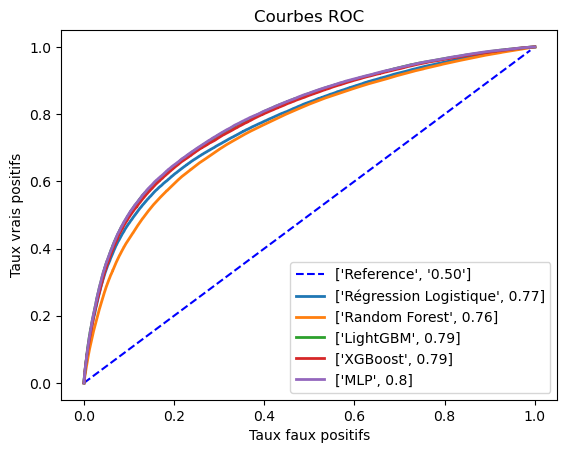

In [4]:
roc_lr = get_initial_model_results("Régression Logistique", X_train, X_test, y_train, y_test)
roc_rf = get_initial_model_results("Random Forest", X_train, X_test, y_train, y_test)
roc_lgbm = get_initial_model_results("LightGBM", X_train, X_test, y_train, y_test)
roc_xgb = get_initial_model_results("XGBoost", X_train, X_test, y_train, y_test)
roc_mlp = get_initial_model_results("MLP", X_train, X_test, y_train, y_test)

              intercept  choc_cote  ageMeanConductors     nbVeh  prof_2.0  \
coeflinreg     0.419575   0.028459           0.018309 -0.031412  0.004013   
coefridgereg   0.419575   0.028459           0.018309 -0.031412  0.004013   
coeflassoreg   0.419575   0.028602           0.016899 -0.027941  0.003416   

              prof_3.0  planGrp_1.0  surf_2.0  surf_8.0   atm_2.0  ...  \
coeflinreg    0.003499     0.011612 -0.008967 -0.003714 -0.006547  ...   
coefridgereg  0.003499     0.011612 -0.008967 -0.003714 -0.006547  ...   
coeflassoreg  0.002693     0.011815 -0.006814 -0.002734 -0.007618  ...   

              populationGrp_Ville Moyenne  mois_label_aug  mois_label_dec  \
coeflinreg                      -0.081097        0.004823       -0.001128   
coefridgereg                    -0.081096        0.004823       -0.001128   
coeflassoreg                    -0.076326        0.004366       -0.000000   

              mois_label_fev  mois_label_jan  mois_label_jul  mois_label_mar  \
coefl

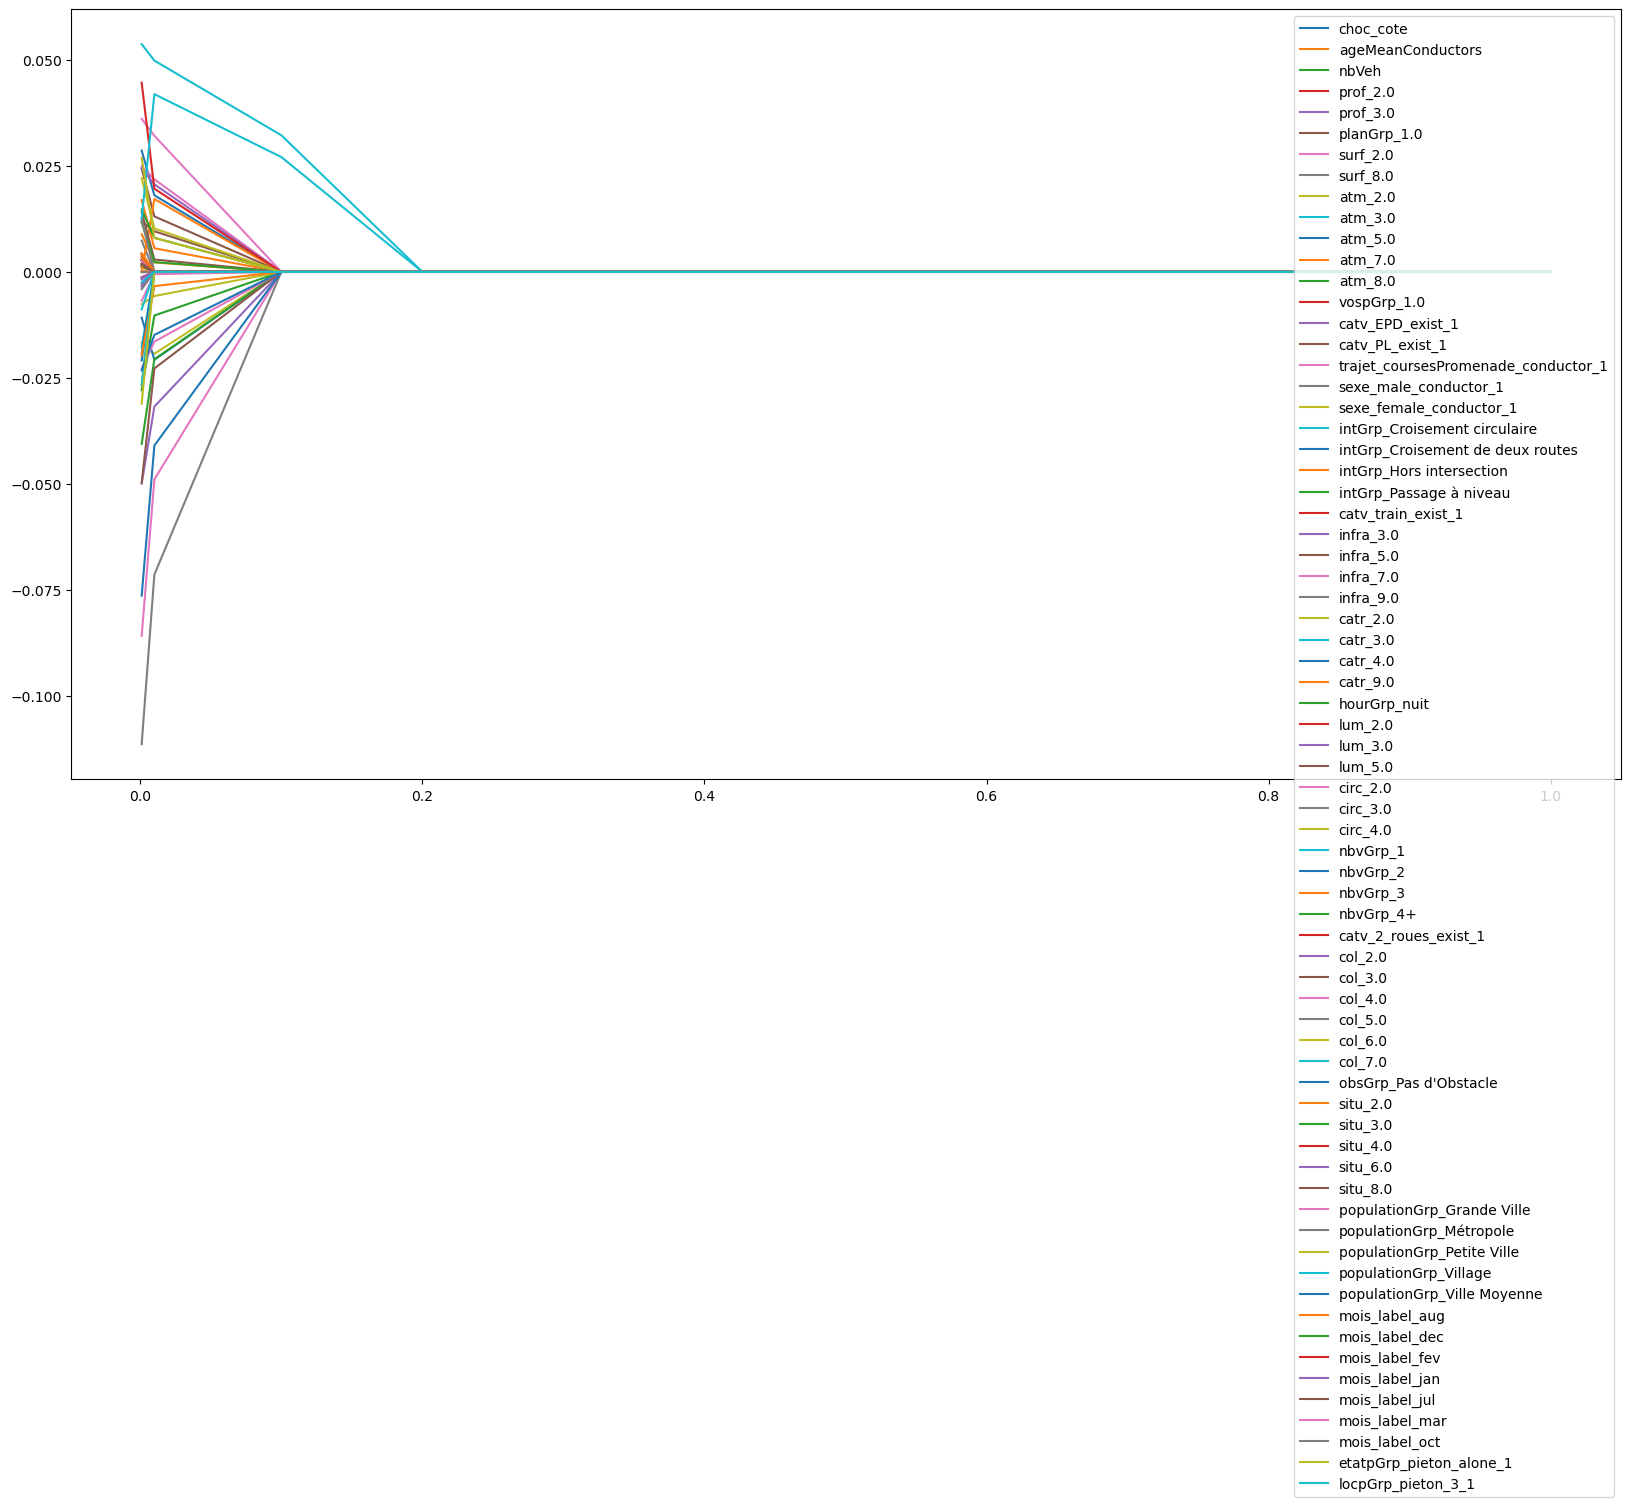

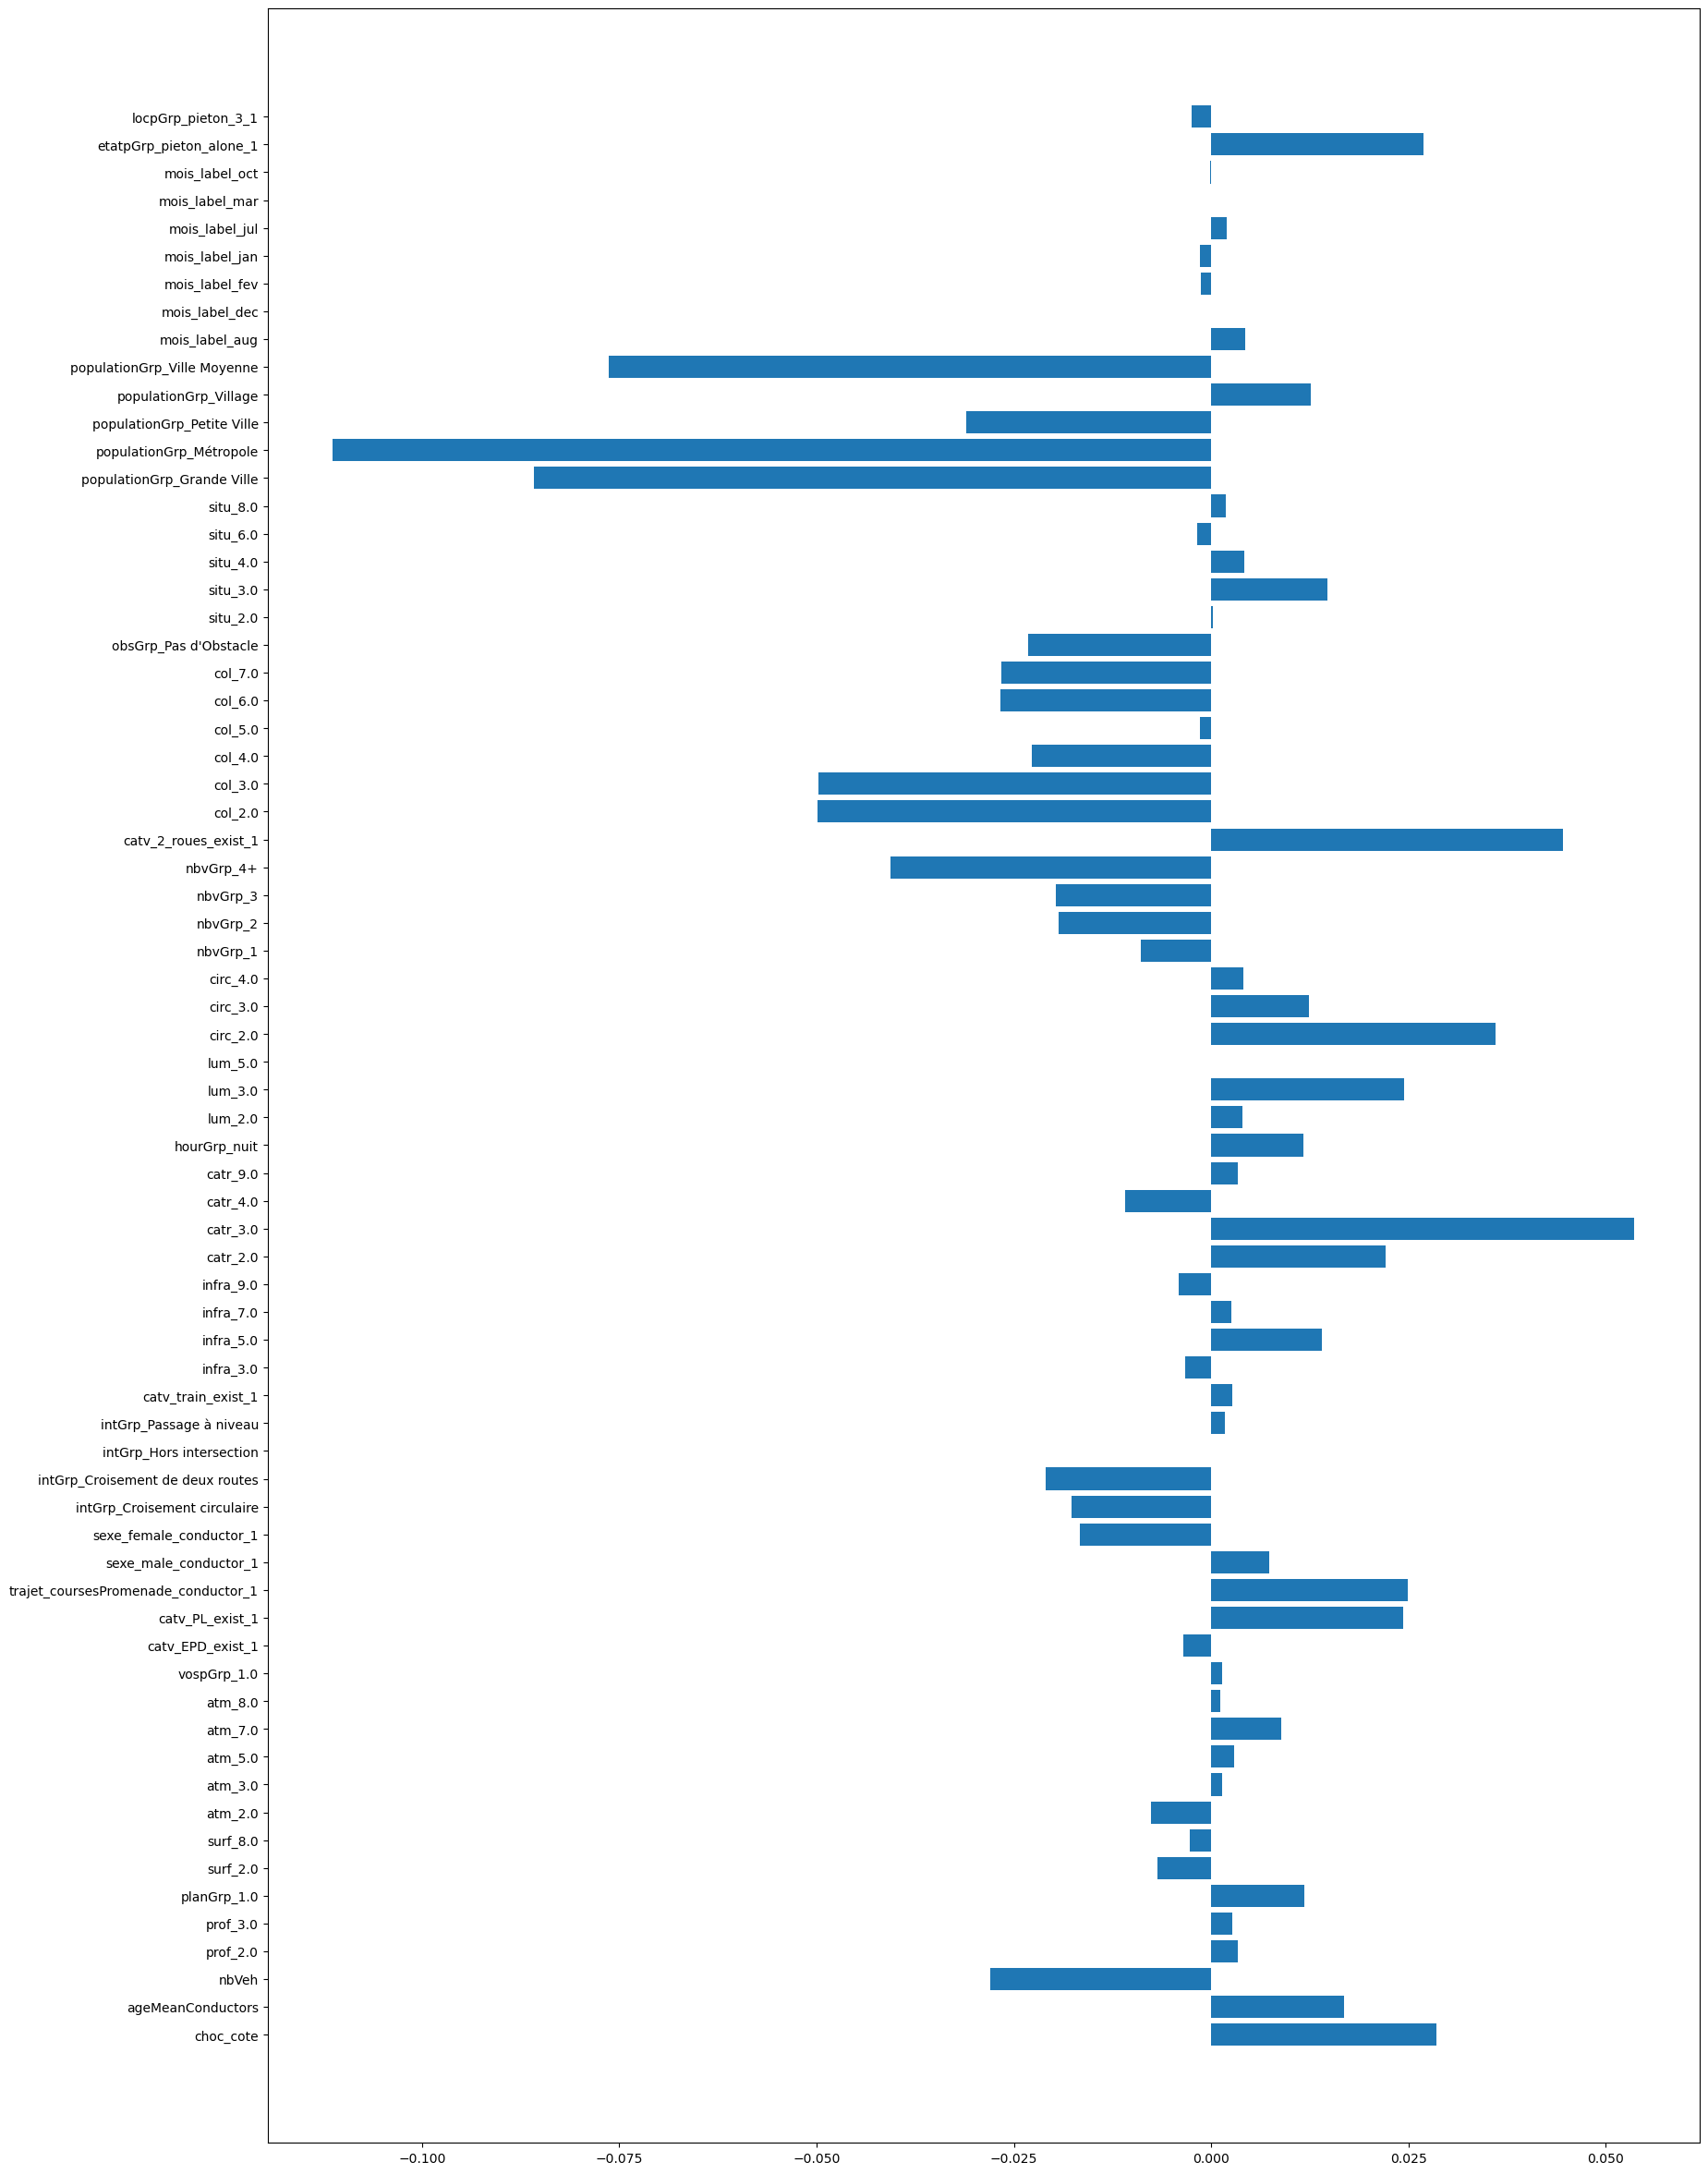

In [5]:
# Exploration des différentes régressions linéraies (lasso, ridge)
exploration_lr(X_train, X_test, y_train, y_test)

In [2]:
# Optimisation de l'ElasticNet
best_params = optimize_elastic_net(X_train, X_test, y_train, y_test)
print(best_params)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV 1/3] END alpha=0.0001, l1_ratio=0.1;, score=(train=0.771, test=0.773) total time=  11.5s
[CV 2/3] END alpha=0.0001, l1_ratio=0.1;, score=(train=0.772, test=0.772) total time=  11.9s
[CV 3/3] END alpha=0.0001, l1_ratio=0.1;, score=(train=0.772, test=0.771) total time=  12.8s
[CV 1/3] END alpha=0.0001, l1_ratio=0.2;, score=(train=0.771, test=0.773) total time=  11.2s
[CV 2/3] END alpha=0.0001, l1_ratio=0.2;, score=(train=0.772, test=0.772) total time=  10.3s
[CV 3/3] END alpha=0.0001, l1_ratio=0.2;, score=(train=0.772, test=0.771) total time=   9.9s
[CV 1/3] END alpha=0.0001, l1_ratio=0.30000000000000004;, score=(train=0.771, test=0.773) total time=   8.2s
[CV 2/3] END alpha=0.0001, l1_ratio=0.30000000000000004;, score=(train=0.772, test=0.772) total time=   9.3s
[CV 3/3] END alpha=0.0001, l1_ratio=0.30000000000000004;, score=(train=0.772, test=0.771) total time=   9.9s
[CV 1/3] END alpha=0.0001, l1_ratio=0.4;, score=(trai

In [2]:
# Enregistrement du meilleur modèle ElasticNet
#best_params = {'alpha': 0.0001, 'l1_ratio': 0.1}
save_elasticnet(X_train, y_train, alpha=0.0001, l1_ratio = 0.1)

In [ ]:
# Optimisation du XGBoost - par tentatives successives de plusieurs paramètres - non lancé ici mais juste pour montrer les tentatives
# Non lancé ici - par nécessité 
parameters = {
    'max_depth': [4, 6],
    'gamma': [0, 0.25, 1],
    'reg_lambda': [0, 1.0, 10.0],
}
#dfResults1 = test_parametres_modele("XGBoost",X_train, y_train, parameters)
### Max_depth=6 always was better in test cases
### 3 best models had reg_lambda=10.0
### We can still question the gamma value

parameters = {
    'max_depth': [4, 6, 8, 10],
    'gamma': [0.25],
    'reg_lambda': [10.0]
}

#dfResults2 = test_parametres_modele("XGBoost",X_train, y_train, parameters)
### Best parameters: {'gamma': 0.25, 'max_depth': 6, 'reg_lambda': 10.0}
### Decision: we keep gamma=0.25, we go beyond max_depth=6 and beyond reg_lambda=10


parameters = {
    'max_depth': [3, 4, 6, 8, 10, 12],
    'gamma': [0, 0.25, 1],
    'min_child_weight': [0, 0.25, 1],
    'n_estimators': [50, 100, 150]
}

#dfResults3 = test_parametres_modele("XGBoost",X_train, y_train, parameters)
### Best parameters: {'gamma': 0, 'max_depth': 6, 'min_child_weight': 0, 'n_estimators': 150}

parameters = {
    'max_depth': [3, 4],
    'gamma': [0.25, 1],
    'min_child_weight': [0.25, 1],
    'n_estimators': [250, 350]
}

#dfResults4 = test_parametres_modele("XGBoost",X_train, y_train, parameters)

parameters = {
    'max_depth': [3, 4, 6],
    'lambda': [2, 4, 7, 15],
    'alpha': [2, 4, 7, 15],
    'n_estimators': [250, 350, 450]
}
#dfResults5 = test_parametres_modele("XGBoost",X_train, y_train, parameters)
### Best parameters: {'alpha': 15, 'lambda': 4, 'max_depth': 4, 'n_estimators': 450}

parameters = {
    'max_depth': [6, 10],
    'lambda': [15, 30, 50],
    'alpha': [15, 30, 50],
    'n_estimators': [450]
}
#dfResults6 = test_parametres_modele("XGBoost",X_train, y_train, parameters)
### Best parameters: {'alpha': 30, 'lambda': 50, 'max_depth': 6, 'n_estimators': 450}

parameters = {
    'max_depth': [4, 6],
    'lambda': [4],
    'alpha': [25, 50, 100],
    'n_estimators': [450, 600, 800]
}
#dfResults7 = test_parametres_modele("XGBoost", X_train, y_train, parameters)
### Best parameters: {'alpha': 25, 'lambda': 4, 'max_depth': 6, 'n_estimators': 450}

parameters = {
    'max_depth': [6],
    'lambda': [15],
    'alpha': [15],
    'n_estimators': [450],
    'learning_rate': [0.3, 0.1, 0.05, 0.01]
}
#dfResults8 = test_parametres_modele("XGBoost",X_train, y_train, parameters)

#dfResults = pd.concat([dfResults1, dfResults2, dfResults3, dfResults4, dfResults5, dfResults6, dfResults7,dfResults8], axis = 1)
#print(dfResults.sort_values(by='mean_test_score', ascending = False))



In [2]:
# On enregistre le modèle optimal trouvé 


save_xgboost(X_train, X_test, y_train, y_test)


[0]	validation_0-auc:0.75458
[1]	validation_0-auc:0.75759
[2]	validation_0-auc:0.76115
[3]	validation_0-auc:0.76165
[4]	validation_0-auc:0.76304
[5]	validation_0-auc:0.76416
[6]	validation_0-auc:0.76609
[7]	validation_0-auc:0.76662
[8]	validation_0-auc:0.76786
[9]	validation_0-auc:0.76881
[10]	validation_0-auc:0.77024
[11]	validation_0-auc:0.77109
[12]	validation_0-auc:0.77236
[13]	validation_0-auc:0.77319
[14]	validation_0-auc:0.77429
[15]	validation_0-auc:0.77519
[16]	validation_0-auc:0.77582
[17]	validation_0-auc:0.77654
[18]	validation_0-auc:0.77759
[19]	validation_0-auc:0.77843
[20]	validation_0-auc:0.77890
[21]	validation_0-auc:0.78014
[22]	validation_0-auc:0.78059
[23]	validation_0-auc:0.78119
[24]	validation_0-auc:0.78207
[25]	validation_0-auc:0.78249
[26]	validation_0-auc:0.78306
[27]	validation_0-auc:0.78324
[28]	validation_0-auc:0.78399
[29]	validation_0-auc:0.78439
[30]	validation_0-auc:0.78475
[31]	validation_0-auc:0.78513
[32]	validation_0-auc:0.78580
[33]	validation_0-au

In [ ]:
# Optimisation d'une RandomForest et enregistrement -- pas refait tourner car prend beaucoup de temps 
n_estimators = [20,50,100, 250]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


test_parametres_modele("RandomForest",X_train, y_train, parameters, save_as = "optimal_model_rf.joblib")

In [3]:
# Optimisation du LightGBM avec Optuna 

study = optuna.create_study(direction='maximize')
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

def objective(trial):
    # Fonction objectif pour l'optimisation d'un algorithme LightGBM 
    # Define hyperparameters
    params = {
        "objective": "binary",
        "feature_pre_filter" :False,
        "metric": "auc",
        'random_state': 1,
        'n_estimators': 250,
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }

    # Train model
    model = lgb.train(params, lgb_train, valid_sets=lgb_test)
    
    # Return accuracy on validation set
    return model.best_score['valid_0']['auc']

study.optimize(objective, n_trials=30)
best_params = study.best_params
model = lgb.train(best_params, lgb_train, valid_sets=lgb_test)

dump(model, 'optimal_model_LGBM.joblib')

[I 2023-02-26 11:34:09,357] A new study created in memory with name: no-name-145c92ae-6d5a-402e-8a43-7d76943270e5
c:\Users\benpa\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.753368
[2]	valid_0's auc: 0.767412
[3]	valid_0's auc: 0.771281
[4]	valid_0's auc: 0.771743
[5]	valid_0's auc: 0.772401
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-02-26 11:34:50,822] Trial 0 finished with value: 0.7934279350012009 and parameters: {'reg_alpha': 6.097645924863158, 'reg_lambda': 7.647240991563885, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 361, 'min_child_samples': 189, 'min_data_per_groups': 25}. Best is trial 0 with value: 0.7934279350012009.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.154221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.761995
[2]	valid_0's auc: 0.767527
[3]	valid_0's auc: 0.769293
[4]	valid_0's auc: 0.770441
[5]	valid_0's auc: 0.770726
[6]	valid_0's auc: 0.771148
[7]	valid_0's auc: 0.77304
[8]	valid_0's auc: 0.774434
[9]	valid_0's auc: 0.774333
[10]	valid_0's auc: 0.775766
[11]	valid_0's auc: 0.776095
[12]	valid_0's auc: 0.776648
[13]	valid_0's auc:

[I 2023-02-26 11:35:19,160] Trial 1 finished with value: 0.793557045123722 and parameters: {'reg_alpha': 6.307655338756045, 'reg_lambda': 2.9912204973514878, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 159, 'min_child_samples': 90, 'min_data_per_groups': 67}. Best is trial 1 with value: 0.793557045123722.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.767695
[2]	valid_0's auc: 0.773991
[3]	valid_0's auc: 0.775201
[4]	valid_0's auc: 0.775793
[5]	valid_0's auc: 0.776386
[6]	valid_0's auc: 0.776711
[7]	valid_0's auc: 0.778403
[8]	valid_0's auc: 0.779494
[9]	valid_0's auc: 0.779199
[10]	valid_0's auc: 0.780704
[11]	valid_0's auc: 0.781073
[12]	valid_0's auc: 0.78178
[13]	valid_0's auc:

[I 2023-02-26 11:36:02,056] Trial 2 finished with value: 0.7959076762387023 and parameters: {'reg_alpha': 3.65580750892261, 'reg_lambda': 0.0010928049713181595, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 369, 'min_child_samples': 88, 'min_data_per_groups': 45}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.759461
[2]	valid_0's auc: 0.766221
[3]	valid_0's auc: 0.770462
[4]	valid_0's auc: 0.771983
[5]	valid_0's auc: 0.772648
[6]	valid_0's auc: 0.773323
[7]	valid_0's auc: 0.774227
[8]	valid_0's auc: 0.774319
[9]	valid_0's auc: 0.774155
[10]	valid_0's auc: 0.775932
[11]	valid_0's auc: 0.776215
[12]	valid_0's auc: 0.776176
[13]	valid_0's auc

[I 2023-02-26 11:36:38,422] Trial 3 finished with value: 0.790682472080935 and parameters: {'reg_alpha': 9.338762713087313, 'reg_lambda': 2.3434228868651026, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 228, 'min_child_samples': 282, 'min_data_per_groups': 29}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.120681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.750615
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.760442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.763475
[LightGBM] [Warning] No further splits with posi

[I 2023-02-26 11:37:11,363] Trial 4 finished with value: 0.79077932195993 and parameters: {'reg_alpha': 2.368868070358967, 'reg_lambda': 8.106298738430858, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 450, 'min_child_samples': 275, 'min_data_per_groups': 66}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.767763
[2]	valid_0's auc: 0.771673
[3]	valid_0's auc: 0.771713
[4]	valid_0's auc: 0.772642
[5]	valid_0's auc: 0.77348
[6]	valid_0's auc: 0.774295
[7]	valid_0's auc: 0.775249
[8]	valid_0's auc: 0.775875
[9]	valid_0's auc: 0.777389
[10]	valid_0's auc: 0.778442
[11]	valid_0's auc: 0.77969
[12]	valid_0's auc: 0.780156
[13]	valid_0's auc: 

[I 2023-02-26 11:37:58,659] Trial 5 finished with value: 0.7940093521883684 and parameters: {'reg_alpha': 8.203291452212266, 'reg_lambda': 1.6666602473098542, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 506, 'min_child_samples': 84, 'min_data_per_groups': 52}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.737645
[2]	valid_0's auc: 0.748375
[3]	valid_0's auc: 0.752961
[4]	valid_0's auc: 0.754872
[5]	valid_0's auc: 0.756313
[6]	valid_0's auc: 0.756157
[7]	valid_0's auc: 0.760603
[8]	valid_0's auc: 0.759824
[9]	valid_0's auc: 0.760411
[10]	valid_0's auc: 0.760057
[11]	valid_0's auc: 0.759903
[12]	valid_0's auc: 0.758995
[13]	valid_0's auc

[I 2023-02-26 11:38:20,687] Trial 6 finished with value: 0.7744570628115902 and parameters: {'reg_alpha': 2.27477225574515, 'reg_lambda': 7.255850267388358, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 10, 'num_leaves': 25, 'min_child_samples': 138, 'min_data_per_groups': 51}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.151353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.767672
[2]	valid_0's auc: 0.774424
[3]	valid_0's auc: 0.775261
[4]	valid_0's auc: 0.776018
[5]	valid_0's auc: 0.77667
[6]	valid_0's auc: 0.776961
[7]	valid_0's auc: 0.778634
[8]	valid_0's auc: 0.779706
[9]	valid_0's auc: 0.779341
[10]	valid_0's auc: 0.780863
[1

[I 2023-02-26 11:39:07,119] Trial 7 finished with value: 0.79465574487188 and parameters: {'reg_alpha': 3.439555448804618, 'reg_lambda': 1.5986444384459542, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 478, 'min_child_samples': 286, 'min_data_per_groups': 83}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.154193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.773384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.77388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.775248
[LightGBM] [Warning] No further splits with posit

[I 2023-02-26 11:39:46,259] Trial 8 finished with value: 0.7947162325724519 and parameters: {'reg_alpha': 2.0481292792045966, 'reg_lambda': 0.5552293770919908, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 871, 'min_child_samples': 32, 'min_data_per_groups': 9}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.75072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.760572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.763376
[LightGBM] [Warning] No further splits with posit

[I 2023-02-26 11:40:19,149] Trial 9 finished with value: 0.7851494339367984 and parameters: {'reg_alpha': 4.784317446517443, 'reg_lambda': 1.6764699402135828, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 10, 'num_leaves': 331, 'min_child_samples': 210, 'min_data_per_groups': 51}. Best is trial 2 with value: 0.7959076762387023.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.118038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.755218
[2]	valid_0's auc: 0.767771
[3]	valid_0's auc: 0.772253
[4]	valid_0's auc: 0.773897
[5]	valid_0's auc: 0.773661
[6]	valid_0's auc: 0.773516
[7]	valid_0's auc: 0.778156
[8]	valid_0's auc: 0.779013
[9]	valid_0's auc: 0.778669
[10]	valid_0's auc: 0.779558
[11]	valid_0's auc: 0.779101
[12]	valid_0's auc: 0.779743
[13]	valid_0's auc

[I 2023-02-26 11:41:12,787] Trial 10 finished with value: 0.7962766178599111 and parameters: {'reg_alpha': 0.5753678634914348, 'reg_lambda': 4.714607468724862, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 725, 'min_child_samples': 13, 'min_data_per_groups': 91}. Best is trial 10 with value: 0.7962766178599111.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.754916
[2]	valid_0's auc: 0.767473
[3]	valid_0's auc: 0.772004
[4]	valid_0's auc: 0.773687
[5]	valid_0's auc: 0.773464
[6]	valid_0's auc: 0.773308
[7]	valid_0's auc: 0.777955
[8]	valid_0's auc: 0.778826
[9]	valid_0's auc: 0.778501
[10]	valid_0's auc: 0.77913
[11]	valid_0's auc: 0.778694
[12]	valid_0's auc: 0.779356
[13]	valid_0's auc:

[I 2023-02-26 11:42:04,257] Trial 11 finished with value: 0.7962594484282722 and parameters: {'reg_alpha': 0.6465027301423175, 'reg_lambda': 5.192640464791942, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 719, 'min_child_samples': 6, 'min_data_per_groups': 95}. Best is trial 10 with value: 0.7962766178599111.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.124207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.755438
[2]	valid_0's auc: 0.767818
[3]	valid_0's auc: 0.772334
[4]	valid_0's auc: 0.774019
[5]	valid_0's auc: 0.773825
[6]	valid_0's auc: 0.773638
[7]	valid_0's auc: 0.778284
[8]	valid_0's auc: 0.779159
[9]	valid_0's auc: 0.77881
[10]	valid_0's auc: 0.779712
[11]	valid_0's auc: 0.779259
[12]	valid_0's auc: 0.779891
[13]	valid_0's auc:

[I 2023-02-26 11:42:55,589] Trial 12 finished with value: 0.796455560823235 and parameters: {'reg_alpha': 0.2887939692747151, 'reg_lambda': 5.182734026570125, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 792, 'min_child_samples': 6, 'min_data_per_groups': 100}. Best is trial 12 with value: 0.796455560823235.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.755425
[2]	valid_0's auc: 0.767735
[3]	valid_0's auc: 0.772294
[4]	valid_0's auc: 0.774087
[5]	valid_0's auc: 0.773902
[6]	valid_0's auc: 0.773786
[7]	valid_0's auc: 0.778376
[8]	valid_0's auc: 0.779248
[9]	valid_0's auc: 0.778907
[10]	valid_0's auc: 0.77979
[L

[I 2023-02-26 11:43:52,834] Trial 13 finished with value: 0.7964810360461836 and parameters: {'reg_alpha': 0.031074224426949293, 'reg_lambda': 5.387563687286935, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 973, 'min_child_samples': 41, 'min_data_per_groups': 100}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.72161
[2]	valid_0's auc: 0.741883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.742705
[4]	valid_0's auc: 0.75269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.7

[I 2023-02-26 11:44:30,364] Trial 14 finished with value: 0.7901071150920307 and parameters: {'reg_alpha': 0.33518172974351856, 'reg_lambda': 9.847482856110743, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 932, 'min_child_samples': 51, 'min_data_per_groups': 75}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.755413
[2]	valid_0's auc: 0.767745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.772253
[4]	valid_0's auc: 0.774027
[5]	valid_0's auc: 0.773845
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2023-02-26 11:45:17,620] Trial 15 finished with value: 0.7963254849537341 and parameters: {'reg_alpha': 0.056112281615760866, 'reg_lambda': 4.808047656629768, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 988, 'min_child_samples': 64, 'min_data_per_groups': 96}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.191441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.754286
[2]	valid_0's auc: 0.766776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.771198
[4]	valid_0's auc: 0.772848
[5]	valid_0's auc: 0.772642
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2023-02-26 11:45:59,539] Trial 16 finished with value: 0.7955407738953985 and parameters: {'reg_alpha': 1.4957960475177492, 'reg_lambda': 5.970383341097325, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 766, 'min_child_samples': 119, 'min_data_per_groups': 99}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.754018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.766568
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.770798
[4]	valid_0's auc: 0.772093
[5]	valid_0's auc: 0

[I 2023-02-26 11:46:40,631] Trial 17 finished with value: 0.7879589366248932 and parameters: {'reg_alpha': 3.5478986075203016, 'reg_lambda': 3.5000084933742466, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.006, 'max_depth': 20, 'num_leaves': 606, 'min_child_samples': 174, 'min_data_per_groups': 84}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.763121
[2]	valid_0's auc: 0.772436
[3]	valid_0's auc: 0.775855
[4]	valid_0's auc: 0.777902
[5]	valid_0's auc: 0.778217
[6]	valid_0's auc: 0.778739
[7]	valid_0's auc: 0.779628
[8]	valid_0's auc: 0.779988
[9]	valid_0's auc: 0.779922
[10]	valid_0's auc: 0.781335
[11]	valid_0's auc: 0.781598
[12]	valid_0's auc: 0.782403
[13]	valid_0's auc

[I 2023-02-26 11:47:25,256] Trial 18 finished with value: 0.7943804722318947 and parameters: {'reg_alpha': 1.4491778108096018, 'reg_lambda': 6.492370950355005, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 853, 'min_child_samples': 2, 'min_data_per_groups': 76}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.768655
[2]	valid_0's auc: 0.772594
[3]	valid_0's auc: 0.772734
[4]	valid_0's auc: 0.773677
[5]	valid_0's auc: 0.774612
[6]	valid_0's auc: 0.77524
[7]	valid_0's auc: 0.776119
[8]	valid_0's auc: 0.776706
[9]	valid_0's auc: 0.776928
[10]	valid_0's auc: 0.777245
[11]	valid_0's auc: 0.777862
[12]	valid_0's auc: 0.777898
[13]	valid_0's auc:

[I 2023-02-26 11:48:09,880] Trial 19 finished with value: 0.7911645025110071 and parameters: {'reg_alpha': 5.336851272196831, 'reg_lambda': 3.885386313791649, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'num_leaves': 661, 'min_child_samples': 43, 'min_data_per_groups': 64}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.752989
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.766981
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.770923
[LightGBM] [Warning] No further splits with posi

[I 2023-02-26 11:48:43,129] Trial 20 finished with value: 0.7951098086170741 and parameters: {'reg_alpha': 7.266917757145787, 'reg_lambda': 8.817595448435178, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 828, 'min_child_samples': 243, 'min_data_per_groups': 85}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.099992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.755415
[2]	valid_0's auc: 0.767759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.772279
[4]	valid_0's auc: 0.774037
[5]	valid_0's auc: 0.773846
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2023-02-26 11:49:29,770] Trial 21 finished with value: 0.7963772675114698 and parameters: {'reg_alpha': 0.06634992974694102, 'reg_lambda': 4.7385273864725335, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 978, 'min_child_samples': 62, 'min_data_per_groups': 98}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.754619
[2]	valid_0's auc: 0.767323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.77183
[4]	valid_0's auc: 0.773456
[5]	valid_0's auc: 0.773244
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2023-02-26 11:50:18,435] Trial 22 finished with value: 0.795834392408308 and parameters: {'reg_alpha': 1.2667223633688078, 'reg_lambda': 5.9309915716089705, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 992, 'min_child_samples': 30, 'min_data_per_groups': 100}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.755351
[2]	valid_0's auc: 0.76766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.772072
[4]	valid_0's auc: 0.773692
[5]	valid_0's auc: 0.773489
[LightGBM] [Warning] No further splits with positive gain, best gain

[I 2023-02-26 11:51:04,270] Trial 23 finished with value: 0.796241896879237 and parameters: {'reg_alpha': 0.12577712877269467, 'reg_lambda': 4.053535223522365, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 904, 'min_child_samples': 111, 'min_data_per_groups': 89}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.166976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.77115
[2]	valid_0's auc: 0.773765
[3]	valid_0's auc: 0.774168
[4]	valid_0's auc: 0.774296
[5]	valid_0's auc: 0.774387
[6]	valid_0's auc: 0.776459
[7]	valid_0's auc: 0.777625
[8]	valid_0's auc: 0.778636
[9]	valid_0's auc: 0.77921
[10]	valid_0's auc: 0.779767
[11]	valid_0's auc: 0.780205
[12]	valid_0's auc: 0.78056
[13]	valid_0's auc: 0

[I 2023-02-26 11:51:45,927] Trial 24 finished with value: 0.7963993649155193 and parameters: {'reg_alpha': 3.0108891739065977, 'reg_lambda': 5.50276668240413, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 803, 'min_child_samples': 65, 'min_data_per_groups': 75}. Best is trial 13 with value: 0.7964810360461836.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.769168
[2]	valid_0's auc: 0.773445
[3]	valid_0's auc: 0.77389
[4]	valid_0's auc: 0.774016
[5]	valid_0's auc: 0.774084
[6]	valid_0's auc: 0.776336
[7]	valid_0's auc: 0.777541
[8]	valid_0's auc: 0.778283
[9]	valid_0's auc: 0.778808
[10]	valid_0's auc: 0.779375
[11]	valid_0's auc: 0.779759
[12]	valid_0's auc: 0.780223
[13]	valid_0's auc:

[I 2023-02-26 11:52:31,450] Trial 25 finished with value: 0.7965832247620798 and parameters: {'reg_alpha': 3.028972920441475, 'reg_lambda': 6.699899022988243, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 603, 'min_child_samples': 27, 'min_data_per_groups': 77}. Best is trial 25 with value: 0.7965832247620798.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.769138
[2]	valid_0's auc: 0.770776
[3]	valid_0's auc: 0.773281
[4]	valid_0's auc: 0.77393
[5]	valid_0's auc: 0.774218
[6]	valid_0's auc: 0.776168
[7]	valid_0's auc: 0.777471
[8]	valid_0's auc: 0.778102
[9]	valid_0's auc: 0.778554
[10]	valid_0's auc: 0.778903
[11]	valid_0's auc: 0.779311
[12]	valid_0's auc: 0.77971
[13]	valid_0's auc: 

[I 2023-02-26 11:53:20,612] Trial 26 finished with value: 0.796300840712517 and parameters: {'reg_alpha': 4.5164115769990945, 'reg_lambda': 6.78061097853365, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 20, 'num_leaves': 620, 'min_child_samples': 25, 'min_data_per_groups': 79}. Best is trial 25 with value: 0.7965832247620798.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.721698
[2]	valid_0's auc: 0.742025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.742651
[4]	valid_0's auc: 0.75267
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's auc: 0.

[I 2023-02-26 11:54:02,174] Trial 27 finished with value: 0.78280498394152 and parameters: {'reg_alpha': 1.2378783711717478, 'reg_lambda': 8.320882706778516, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 20, 'num_leaves': 572, 'min_child_samples': 3, 'min_data_per_groups': 90}. Best is trial 25 with value: 0.7965832247620798.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[1]	valid_0's auc: 0.770876
[2]	valid_0's auc: 0.770988
[3]	valid_0's auc: 0.772971
[4]	valid_0's auc: 0.773452
[5]	valid_0's auc: 0.773606
[6]	valid_0's auc: 0.773708
[7]	valid_0's auc: 0.773745
[8]	valid_0's auc: 0.773781
[9]	valid_0's auc: 0.773885
[10]	valid_0's auc: 0.775123
[11]	valid_0's auc: 0.776055
[12]	valid_0's auc: 0.776872
[13]	valid_0's auc

[I 2023-02-26 11:54:47,286] Trial 28 finished with value: 0.7920595786086766 and parameters: {'reg_alpha': 2.5194447511472897, 'reg_lambda': 6.393340484830948, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 679, 'min_child_samples': 148, 'min_data_per_groups': 58}. Best is trial 25 with value: 0.7965832247620798.


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286330, number of negative: 396099
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419575 -> initscore=-0.324519
[LightGBM] [Info] Start training from score -0.324519
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.754037
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.768199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.771931
[LightGBM] [Warning] No further splits with posi

[I 2023-02-26 11:55:27,594] Trial 29 finished with value: 0.7893425679660983 and parameters: {'reg_alpha': 4.241367861944113, 'reg_lambda': 7.49285135015494, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 781, 'min_child_samples': 178, 'min_data_per_groups': 43}. Best is trial 25 with value: 0.7965832247620798.


[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.115005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 682429, number of used features: 70
[LightGBM] [Info] Start training from score 0.419575


['optimal_model_LGBM.joblib']